Use NPL kernel on NCAR machine

In [12]:
import pandas as pd 
import matplotlib.colors as colors
import numpy as np
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# Prepare data

In [2]:
# load data
filepath = '/glade/work/psturm/ice-mp-su24/saved_trajectory_data/trajs_5100_7200_Ns10000.csv' # obin's latest csv with combined data
df = pd.read_csv(filepath)
# sort df
sort_cols = ['time', 'rk_deact']
df_sort = df.sort_values(by=sort_cols)
df_sort['volume[m3]'] = (4/3)*np.pi*(df_sort['radius_eq(ice)[m]'])**3
df_sort['mass[kg]'] = df_sort['volume[m3]']*df_sort['density(droplet/ice)[kg/m3]']
# df of current timestep
df1 = df_sort 
n_unique_ids = len(df1['rk_deact'].unique())
len_df = len(df1) - n_unique_ids
df1 = df_sort[:len_df]
df1.reset_index(inplace=True)
# df of next timestep
df2 = df_sort
df2 = df2[n_unique_ids:]
df2.reset_index(inplace=True)
# join dataframes
df = df1.join(df2, lsuffix='_1', rsuffix='_2')
# additional variables
df['delta_mass'] = df['mass[kg]_2'] - df['mass[kg]_1'] # add change in mass
df['delta_r'] = df['radius_eq(ice)[m]_2'] - df['radius_eq(ice)[m]_1'] # add change in radius
df['delta_mass_abs'] = df['delta_mass'].abs()
df['delta_r_abs'] = df['delta_r'].abs()
df['delta_vol'] = df['volume[m3]_2'] - df['volume[m3]_1'] # add change in volume
df['delta_vol_abs'] = df['delta_vol'].abs()

# Δ(mass) vs. Δ(radius) scatter plots

In [21]:
# plotting parameters 
n_samples = 347060 # max=347060
colormap = 'viridis' 
edge_color = 'white'
edge_alpha = 0.1

## Linear scaling for dm, dr and r_initial

### All particles

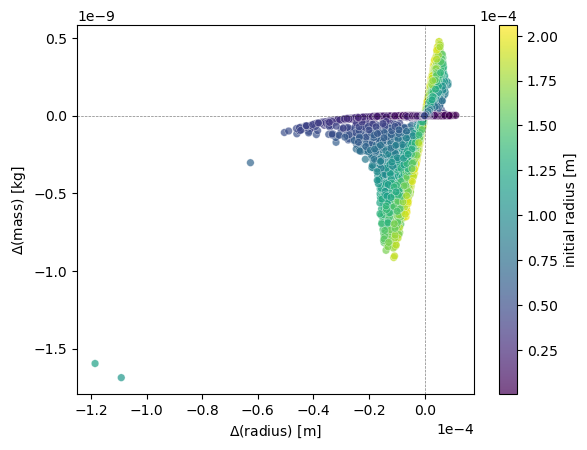

In [4]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples)
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r', 'delta_mass', c='radius_eq(ice)[m]_1', 
                            alpha=0.7, 
                            cmap=colormap,
                            s=30,
                            edgecolors=edge_color,
                            linewidth=0.3)
ax.set_xlabel(r'$\Delta$(radius) [m]')
ax.set_ylabel(r'$\Delta$(mass) [kg]')
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.collections[0].colorbar.formatter.set_powerlimits((0, 0)) # change colorbar to scientific notation
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black');

### Small (r<1e-4) particles, 200 < rho_dep < 250

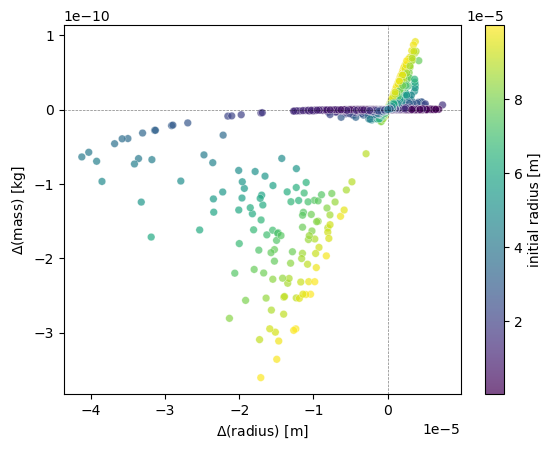

In [5]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples)
df_subset = df_subset[df_subset['radius_eq(ice)[m]_1']<1e-4]
df_subset = df_subset[(df_subset['rhod [kg/m3]_1']>200) & (df_subset['rhod [kg/m3]_1']<250)]
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r', 'delta_mass', c='radius_eq(ice)[m]_1', 
                            alpha=0.7, 
                            cmap=colormap,
                            s=30,
                            edgecolors=edge_color,
                            linewidth=0.3)
ax.set_xlabel(r'$\Delta$(radius) [m]')
ax.set_ylabel(r'$\Delta$(mass) [kg]')
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.collections[0].colorbar.formatter.set_powerlimits((0, 0)) # change colorbar to scientific notation
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black');

## Absolute values

### Linear scale on both axes, small particles

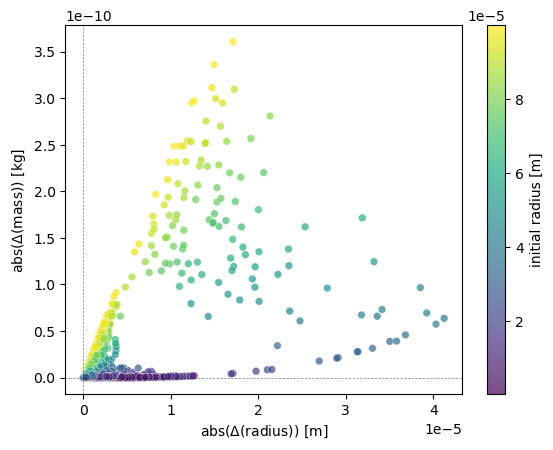

In [6]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples)
df_subset = df_subset[df_subset['radius_eq(ice)[m]_1']<1e-4]
df_subset = df_subset[(df_subset['rhod [kg/m3]_1']>200) & (df_subset['rhod [kg/m3]_1']<250)]
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r_abs', 'delta_mass_abs', c='radius_eq(ice)[m]_1', 
                            alpha=0.7, 
                            cmap=colormap,
                            s=30,
                            edgecolors=edge_color,
                            linewidth=0.3,
                           )
ax.set_xlabel(r'abs($\Delta$(radius)) [m]')
ax.set_ylabel(r'abs($\Delta$(mass)) [kg]')
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black');

### log-linear scale. small particles

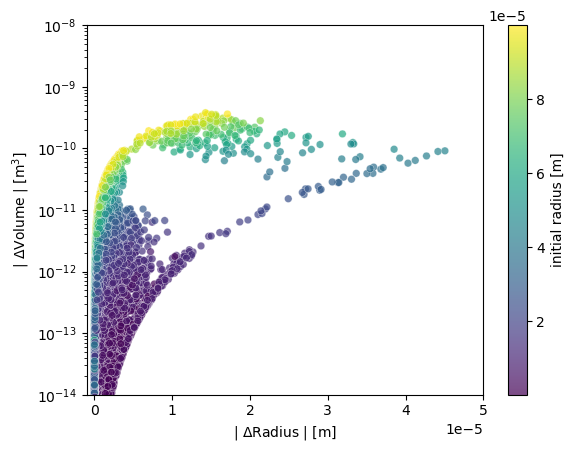

In [7]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples)
df_subset = df_subset[df_subset['radius_eq(ice)[m]_1']<1e-4]
df_subset = df_subset[(df_subset['rhod [kg/m3]_1']>200) & (df_subset['rhod [kg/m3]_1']<300)]
xmin, xmax = -1e-6, 5e-5
ymin, ymax = 10e-15, 10e-9
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r_abs', 'delta_mass_abs', c='radius_eq(ice)[m]_1', 
                            alpha=0.7, 
                            xlim=(xmin, xmax),
                            ylim=(ymin, ymax),
                            cmap=colormap,
                            s=30,
                            edgecolors=edge_color,
                            linewidth=0.3,
                           )
ax.set_xlabel(r'| $\Delta$Radius | [m]')
ax.set_ylabel(r'| $\Delta$Volume | [$\mathrm{m^3}$]')
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.collections[0].colorbar.formatter.set_powerlimits((0, 0)) # change colorbar to scientific notation
ax.set_yscale('log')

### log-log scale. linear colorbar, small particles

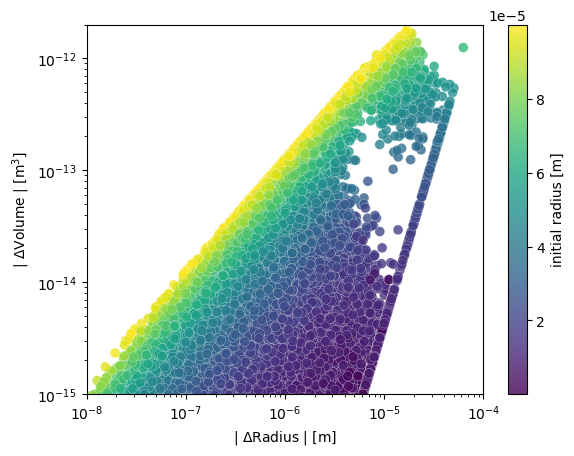

In [8]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples, random_state=666)
df_subset = df_subset[df_subset['radius_eq(ice)[m]_1']<1e-4]
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r_abs', 'delta_vol_abs', c='radius_eq(ice)[m]_1', 
                            alpha=0.8, 
                            cmap='viridis',
                            s=50,
                            edgecolors=edge_color,
                            linewidth=0.2,
                           )
ax.set_xlabel(r'| $\Delta$Radius | [m]')
ax.set_ylabel(r'| $\Delta$Volume | [$\mathrm{m^3}$]')
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.collections[0].colorbar.formatter.set_powerlimits((0, 0)) # change colorbar to scientific notation
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-8, 1e-4)
ax.set_ylim(1e-15, 2e-12);

### log-log scale, log colorbar, all particles

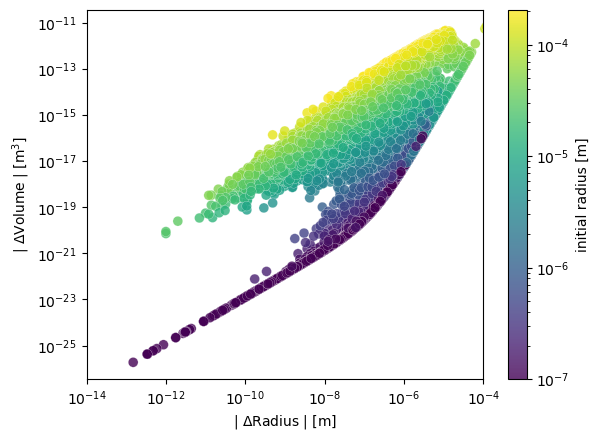

In [9]:
# Plot change in mass vs. change in radius, colored by original radius
df_subset = df.sample(n_samples, random_state=666)
edge_color = colors.colorConverter.to_rgba(edge_color, alpha=edge_alpha)
ax = df_subset.plot.scatter('delta_r_abs', 'delta_vol_abs', c='radius_eq(ice)[m]_1', 
                            alpha=0.8, 
                            cmap='viridis',
                            s=50,
                            edgecolors=edge_color,
                            linewidth=0.2,
                            norm=colors.LogNorm() # log-scale colorbar
                           )
ax.set_xlabel(r'| $\Delta$Radius | [m]')
ax.set_ylabel(r'| $\Delta$Volume | [$\mathrm{m^3}$]')
ax.collections[0].colorbar.set_label(r'initial radius [m]') # label colorbar
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-14, 1e-4);

## Color by RH, varying marker size

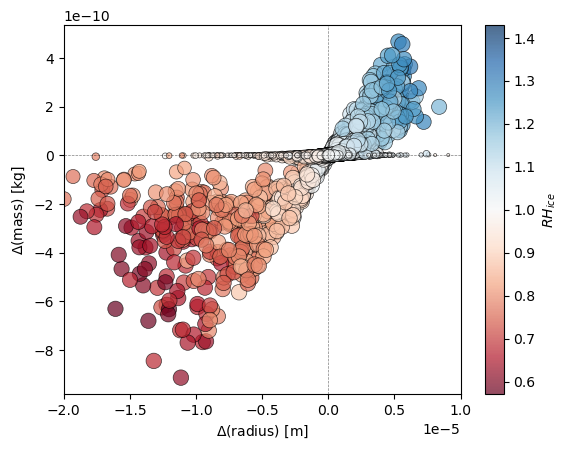

In [23]:
'''
Plot change in mass vs. change in radius
color by relative humidity w.r.t. ice
size by initial radius
Quantile transform + minmax scaling applied to radius
'''
df_subset = df.sample(int(n_samples/10), random_state=666)
marker_min = 5
marker_max = 125
scaler = MinMaxScaler((marker_min, marker_max))
quant_transform = QuantileTransformer()
edge_color = colors.colorConverter.to_rgba('black', alpha=edge_alpha)
marker_sizes = quant_transform.fit_transform(df_subset[['radius_eq(ice)[m]_1']])
marker_sizes = scaler.fit_transform(marker_sizes)
ax = df_subset.plot.scatter('delta_r', 'delta_mass', c='RH_ice_1', 
                            alpha=0.7, xlim=(-2e-5, 1e-5), s=marker_sizes, 
                            colormap='RdBu', norm=colors.CenteredNorm(1.0),
                            edgecolors=edge_color, linewidth=0.5)
ax.set_xlabel(r'$\Delta$(radius) [m]')
ax.set_ylabel(r'$\Delta$(mass) [kg]')
ax.collections[0].colorbar.set_label(r'$RH_{ice}$') # label colorbar
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black');

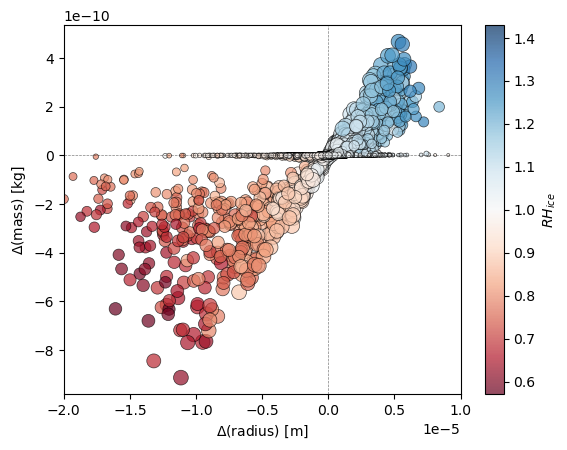

In [24]:
'''
Plot change in mass vs. change in radius
color by relative humidity w.r.t. ice
size by initial radius
Only minmax scaling applied to radius
'''
df_subset = df.sample(int(n_samples/10), random_state=666)
marker_min = 5
marker_max = 125
scaler = MinMaxScaler((marker_min, marker_max))
edge_color = colors.colorConverter.to_rgba('black', alpha=0.1)
marker_sizes = scaler.fit_transform(df_subset[['radius_eq(ice)[m]_1']])
ax = df_subset.plot.scatter('delta_r', 'delta_mass', c='RH_ice_1', 
                            alpha=0.7, xlim=(-2e-5, 1e-5), s=marker_sizes, 
                            colormap='RdBu', norm=colors.CenteredNorm(1.0),
                            edgecolors=edge_color, linewidth=0.5)
ax.set_xlabel(r'$\Delta$(radius) [m]')
ax.set_ylabel(r'$\Delta$(mass) [kg]')
ax.collections[0].colorbar.set_label(r'$RH_{ice}$') # label colorbar
ax.axhline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')
ax.axvline(linestyle='--', linewidth=0.5, alpha=0.5, color='black')